# Arabidopsis 

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import numpy as np
import dill

In [ ]:
summary = pd.read_csv("pySeqRNA_results/KEGG_pathway/GL0.5-HL0.5_kegg.txt", sep="\t")

In [ ]:

pvals= summary['Pvalues']



summary['log10-Pvalue'] =-np.log10(pvals)

df = summary.nlargest(20, ['log10-Pvalue'])

df.sort_values(by=['log10-Pvalue'], inplace=True, ascending=True)


In [ ]:

cmap = ListedColormap(sns.color_palette("hot"))

desc= list(df['Description'])
norm = plt.Normalize(df['log10-Pvalue'].min(), df['log10-Pvalue'].max())
norm
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
size = list(df['log10-Pvalue']*10)

ax= sns.scatterplot(x='Count', y='Description',hue='Count',palette=cmap,edgecolor='black',data=df.iloc[::-1],linewidth=1,alpha=0.6, s=10, size='log10-Pvalue', sizes=(50, 150))


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_bounds((0, 20))
# add some space between the axis and the plot
ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 5))
plt.setp(ax.get_xticklabels(), Fontsize=14)
plt.setp(ax.get_yticklabels(), Fontsize=14)
plt.xlabel("Counts", fontsize=16, fontweight='bold')
plt.ylabel("KEGG Pathway Description", fontsize=16, fontweight='bold')
plt.legend( bbox_to_anchor=(1.3, 0.5),ncol = 1, loc='center', fontsize=12)
fig = plt.gcf()
fig.set_size_inches(18, 10)
fig.tight_layout()
fig.savefig('test2png.png', dpi=300)

In [1]:
import os
import math
import pylab as plt
import numpy as np
import pandas as pd
import matplotlib.patches as patches
import gzip
from Bio import SeqIO



In [2]:
def plot_fastq_qualities(filename, ax=None, limit=10000):

    fastq_parser = SeqIO.parse(gzip.open(filename, "rt"), "fastq")
    res=[]
    c=0
    for record in fastq_parser:
        score=record.letter_annotations["phred_quality"]
        res.append(score)
        c+=1
        if c>limit:
            break
    df = pd.DataFrame(res)
    l = len(df.T)+1

    if ax==None:
        f,ax=plt.subplots(figsize=(12,5))
    rect = patches.Rectangle((0,0),l,20,linewidth=0,facecolor='r',alpha=.4)
    ax.add_patch(rect)
    rect = patches.Rectangle((0,20),l,8,linewidth=0,facecolor='yellow',alpha=.4)
    ax.add_patch(rect)
    rect = patches.Rectangle((0,28),l,12,linewidth=0,facecolor='g',alpha=.4)
    ax.add_patch(rect)
    df.mean().plot(ax=ax,c='black')
    boxprops = dict(linestyle='-', linewidth=1, color='black')
    df.plot(kind='box', ax=ax, grid=False, showfliers=False,
            color=dict(boxes='black',whiskers='black')  )
    ax.set_xticks(np.arange(0, l, 5))
    ax.set_xticklabels(np.arange(0, l, 5))
    ax.set_xlabel('position(bp)')
    ax.set_xlim((0,l))
    ax.set_ylim((0,40))
    ax.set_title('per base sequence quality')    
    return


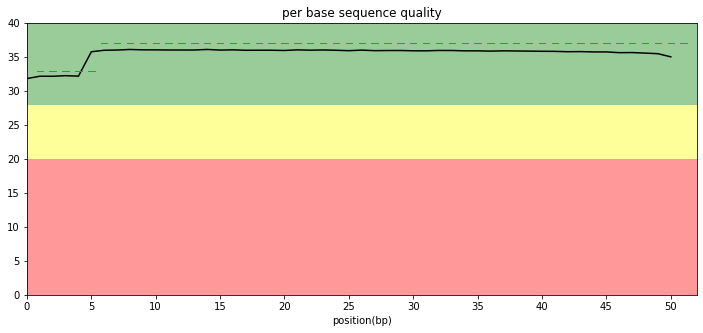

In [4]:
plot_fastq_qualities("/home/naveen/Downloads/arabidopsis/SRR6767632.fastq.gz")

In [5]:
def fastq_to_dataframe(filename, size=1000):
    """Convert fastq to dataframe.
        size: limit to the first reads of total size
        Returns: dataframe with reads
    """

    ext = os.path.splitext(filename)[1]
    if ext=='.fastq' or ext=='.gz':
        fastq_parser = SeqIO.parse(gzip.open(filename, "rt"), "fastq")
    else:
        fastq_parser = SeqIO.parse(open(filename, "r"), "fastq")
    i=0
    res=[]
    for fastq_rec in fastq_parser:
        #print (fastq_rec.seq)
        i+=1
        if i>size:
            break
        res.append([fastq_rec.id, str(fastq_rec.seq)])
    df = pd.DataFrame(res, columns=['id','seq'])
    df['length'] = df.seq.str.len()
    return df

def normpdf(x, mean, sd):
    """sample a normal distribution at given point"""

    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

def plot_fastq_gc_content(filename, ax=None, limit=50000):

    from Bio.SeqUtils import GC
    if ax==None:
        f,ax=plt.subplots(figsize=(12,5))
    df = fastq_to_dataframe(filename, size=limit)
    gc = df.seq.apply(lambda x: GC(x))  
    gc.hist(ax=ax,bins=150,color='black',grid=False,histtype='step',lw=2)
    ax.set_xlim((0,100))    
    x=np.arange(1,100,.1)
    f = [normpdf(i, gc.mean(), gc.std()) for i in x]    
    ax2=ax.twinx()   
    ax2.plot(x,f)
    ax2.set_ylim(0,max(f))
    ax.set_title('GC content',size=15)
    return


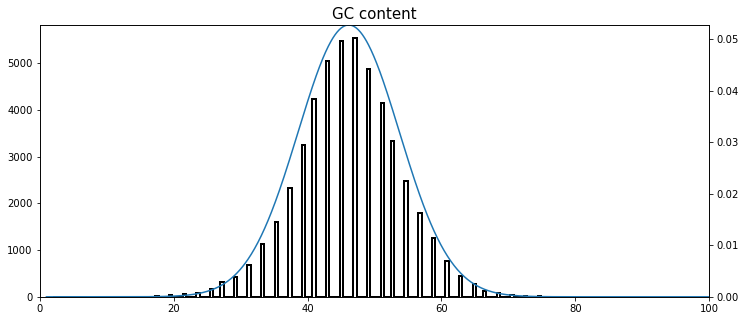

In [6]:
plot_fastq_gc_content("/home/naveen/Downloads/arabidopsis/SRR6767632.fastq.gz")